In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
from sklearn.tree import DecisionTreeClassifier

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
df = data.copy()

In [4]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [5]:
## Zastąpienie NaN w id company oraz agent zerami
df[['agent','company']] = df[['agent','company']].fillna(0.0)

## Zastąpienie brakujących wartości w kolumnie country modą
df['country'].fillna(data.country.mode().to_string(), inplace=True)

## Zastąpienie brakujących wartości w kolumnie children średnią
df['children'].fillna(round(data.children.mean()), inplace=True)

## Usunięcie wierszy z wartością zero w kolumnach adults, babies, children
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [6]:
## Zamiana typów float na int
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [7]:
## Funkcja do przygotowania danych procentowych
def get_count(series, limit=None):
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
        
    x = series.index
    y = series/series.sum()*100
    return x.values,y.values

In [8]:
## Funkcja do generowania wykresów
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=figsize)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
    plt.show()

In [9]:
## Przygotowanie danych dla zbadania udziału odwołanych i nieodwołanych rezerwacji
x, y = get_count(df['is_canceled'])
x, y

(array([0, 1], dtype=int64), array([62.92341247, 37.07658753]))

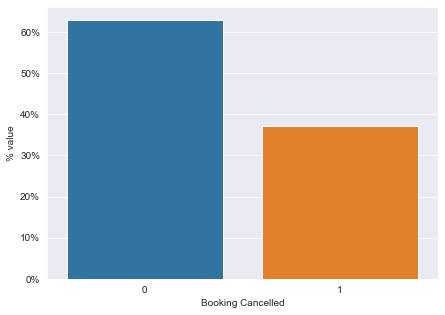

In [10]:
## Wykres przedstawiający udział procentowy odwołanych i nieodwołanych rezerwacji
plot(x, y, x_label='Booking Cancelled', y_label='% value')
## 37% rezerwacji zostało odwołanych

In [11]:
## Analiza dla rezerwacji nieodwołanych
df_not_canceled = df[df['is_canceled'] == 0]
## Analiza dla rezerwacji odwołanych
df_canceled = df[df['is_canceled'] == 1]

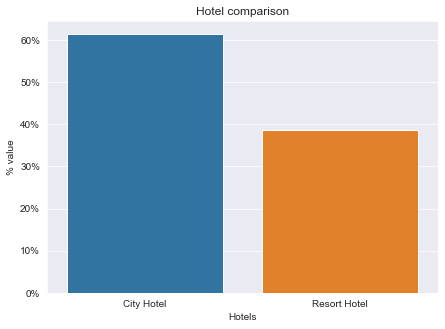

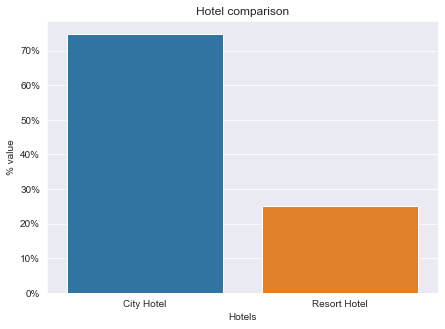

In [12]:
## Przygotowanie danych i generowanie wykresu udziału procentowego typów hoteli (nieodwołana rezerwacja)
x, y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='% value', title='Hotel comparison')
## Ponad 60% rezerwacji dotyczy hoteli miejskich


## Przygotowanie danych i generowanie wykresu udziału procentowego typów hoteli (odwołana rezerwacja)
x, y = get_count(df_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='% value', title='Hotel comparison')
## 75% rezerwacji dotyczy hoteli miejskich

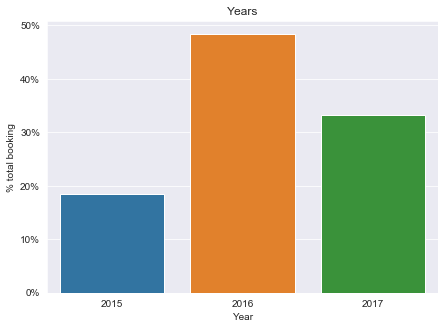

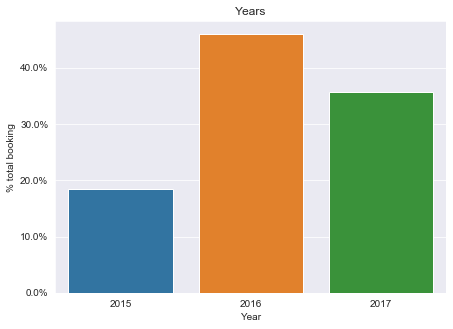

In [22]:
## Przygotowanie danych i generowanie wykresu udziału procentowego rezerwacji w poszczególnych latach
x, y = get_count(df_not_canceled['arrival_date_year'])
plot(x, y, x_label = 'Year', y_label = '% total booking', title = 'Years')
## Prawie połowa rezerwacji dokonana w 2016 roku
## Spadek ilości rezerwacji o prawie 30% w roku 2017


## Przygotowanie danych i generowanie wykresu udziału procentowego rezerwacji w poszczególnych latach
x, y = get_count(df_canceled['arrival_date_year'])
plot(x, y, x_label = 'Year', y_label = '% total booking', title = 'Years')
## Prawie połowa rezerwacji dokonana w 2016 roku
## Spadek ilości rezerwacji o blisko 20% w roku 2017

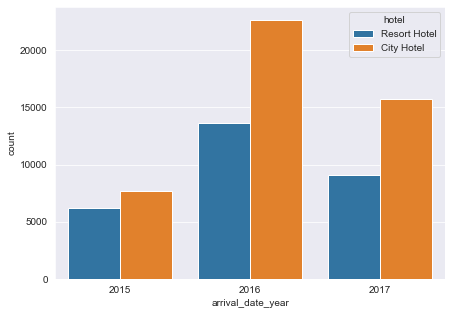

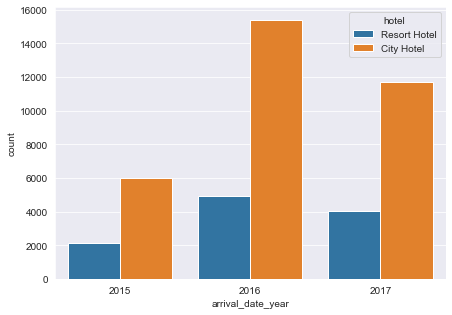

In [14]:
## Rozbicie na typy hoteli (nieodwołane)
plt.subplots(figsize = (7,5))
sns.countplot(x = 'arrival_date_year', hue = 'hotel', data = df_not_canceled);


## Rozbicie na typy hoteli (odwołane)
plt.subplots(figsize = (7,5))
sns.countplot(x = 'arrival_date_year', hue = 'hotel', data = df_canceled);

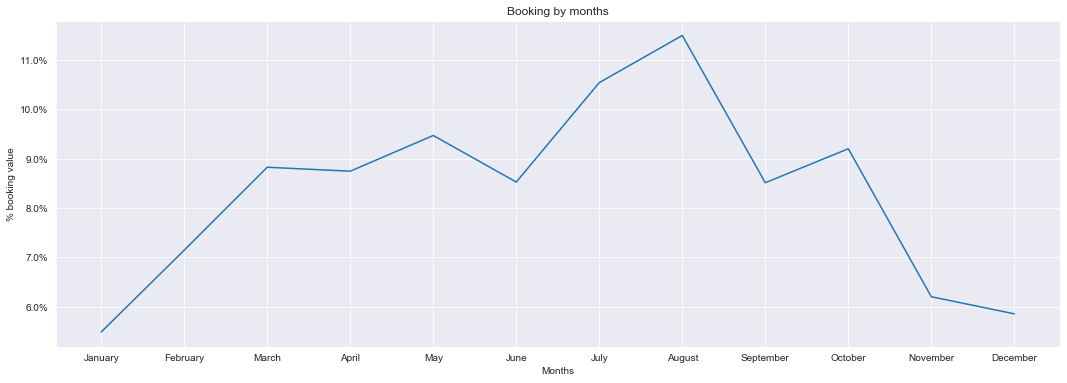

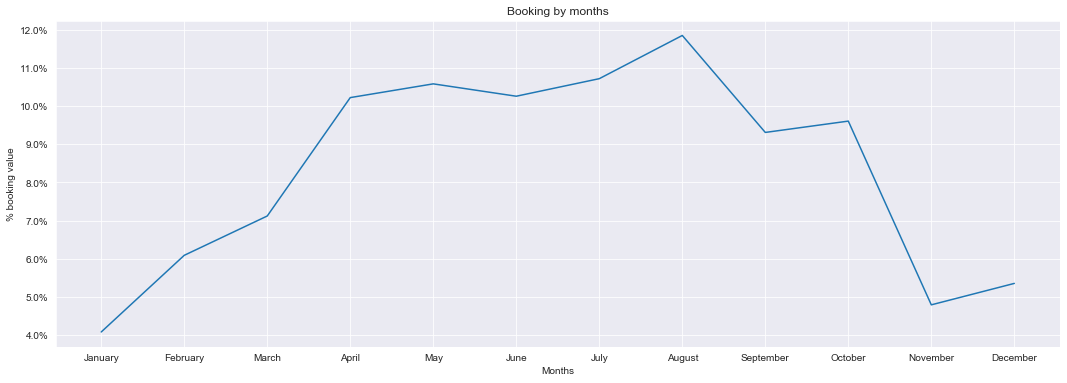

In [23]:
## Najbardziej oblegane miesiące (nieodwołane)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(months)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plot(x, y.values, x_label = 'Months', y_label = '% booking value', title = 'Booking by months', type = 'line', figsize = (18,6))
## Z wykresu wynika, że najwięcej rezerwacji dokonywano w lipcu i sierpniu


## Najbardziej oblegane miesiące (odwołane)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
sorted_months = df_canceled['arrival_date_month'].value_counts().reindex(months)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plot(x, y.values, x_label = 'Months', y_label = '% booking value', title = 'Booking by months', type = 'line', figsize = (18,6))
## Wykres w przybliżeniu pokrywa się z tym dla rezerwacji nieodwołanych

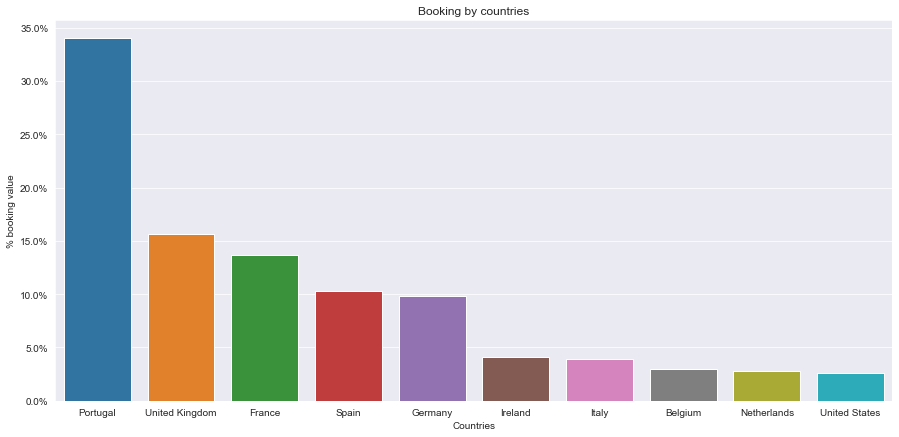

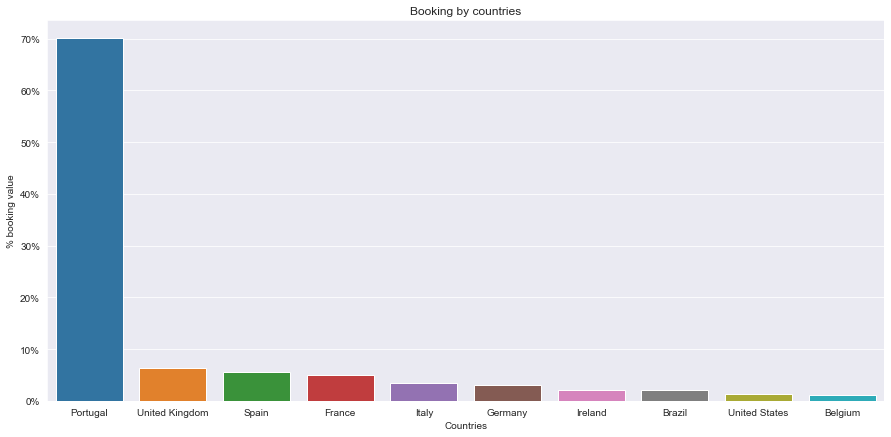

In [16]:
## Przygotowanie danych i generowanie wykresu udziału procentowego rezerwacji nieodwołanych w poszczególnych krajach
x, y = get_count(df_not_canceled['country'], limit = 10) ## Wprowadzenie parametru limit do funkcji get_count

## Wykorzystanie biblioteki pycountry dla zamiany kodów na nazwę kraju
country_name = [pc.countries.get(alpha_3 = name).name for name in x]

plot(country_name,y, x_label = 'Countries', y_label = '% booking value', title = 'Booking by countries', figsize = (15,7))
## Portugalia, UK, Francja, Hiszpania i Niemcy odpowiadają za ponad 80% rezerwacji


## Przygotowanie danych i generowanie wykresu udziału procentowego rezerwacji odwołanych w poszczególnych krajach
x, y = get_count(df_canceled['country'], limit = 10) ## Wprowadzenie parametru limit do funkcji get_count

## Wykorzystanie biblioteki pycountry dla zamiany kodów na nazwę kraju
country_name = [pc.countries.get(alpha_3 = name).name for name in x]

plot(country_name,y, x_label = 'Countries', y_label = '% booking value', title = 'Booking by countries', figsize = (15,7))
## Znakomita większość odwołanych dla Portugalii

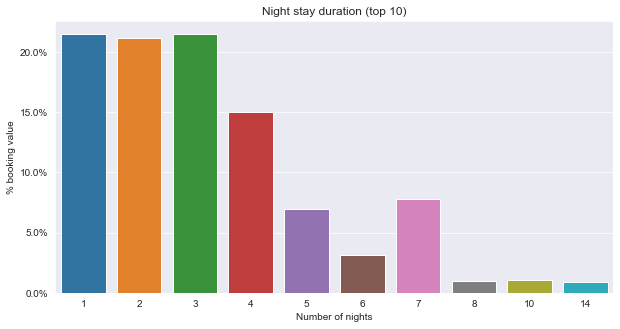

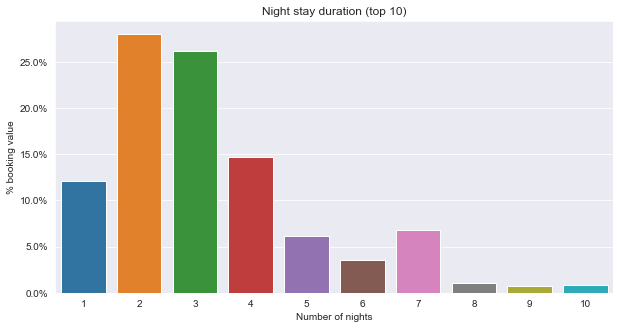

In [17]:
## Przygotowanie danych i generowanie wykresu na temat długości pobytu (nieodwołane)
total_nights = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']
x, y = get_count(total_nights, limit = 10)

plot(x, y, x_label = 'Number of nights', y_label = '% booking value', title = 'Night stay duration (top 10)', figsize = (10,5))
## Przewaga rezerwacji na 1, 2, 3 i 4 dni


## Przygotowanie danych i generowanie wykresu na temat długości pobytu (odwołane)
total_nights = df_canceled['stays_in_weekend_nights'] + df_canceled['stays_in_week_nights']
x, y = get_count(total_nights, limit = 10)

plot(x, y, x_label = 'Number of nights', y_label = '% booking value', title = 'Night stay duration (top 10)', figsize = (10,5))
## Mniej rezerwacji odwołanych na 1 dzień wględem nieodwołanych

In [18]:
## Kopia datasetu
df_subset = df.copy()

In [19]:
## Stworzenie nowej cechy na podstawie różnic w typie rezerwowanego i otrzymanego pokoju
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

## Stworzenie nowej cechy na podstawie poprzenich anulacji
## Jeśli liczba poprzednich odwołanych rezerwacji jest większa od nieodwołanych rezerwacji to 1, w przeciwnym
## przypadku 0
df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [20]:
# Usunięcie niepotrzebnych cech
df_subset = df_subset.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'previous_cancellations', 'previous_bookings_not_canceled'], axis=1)

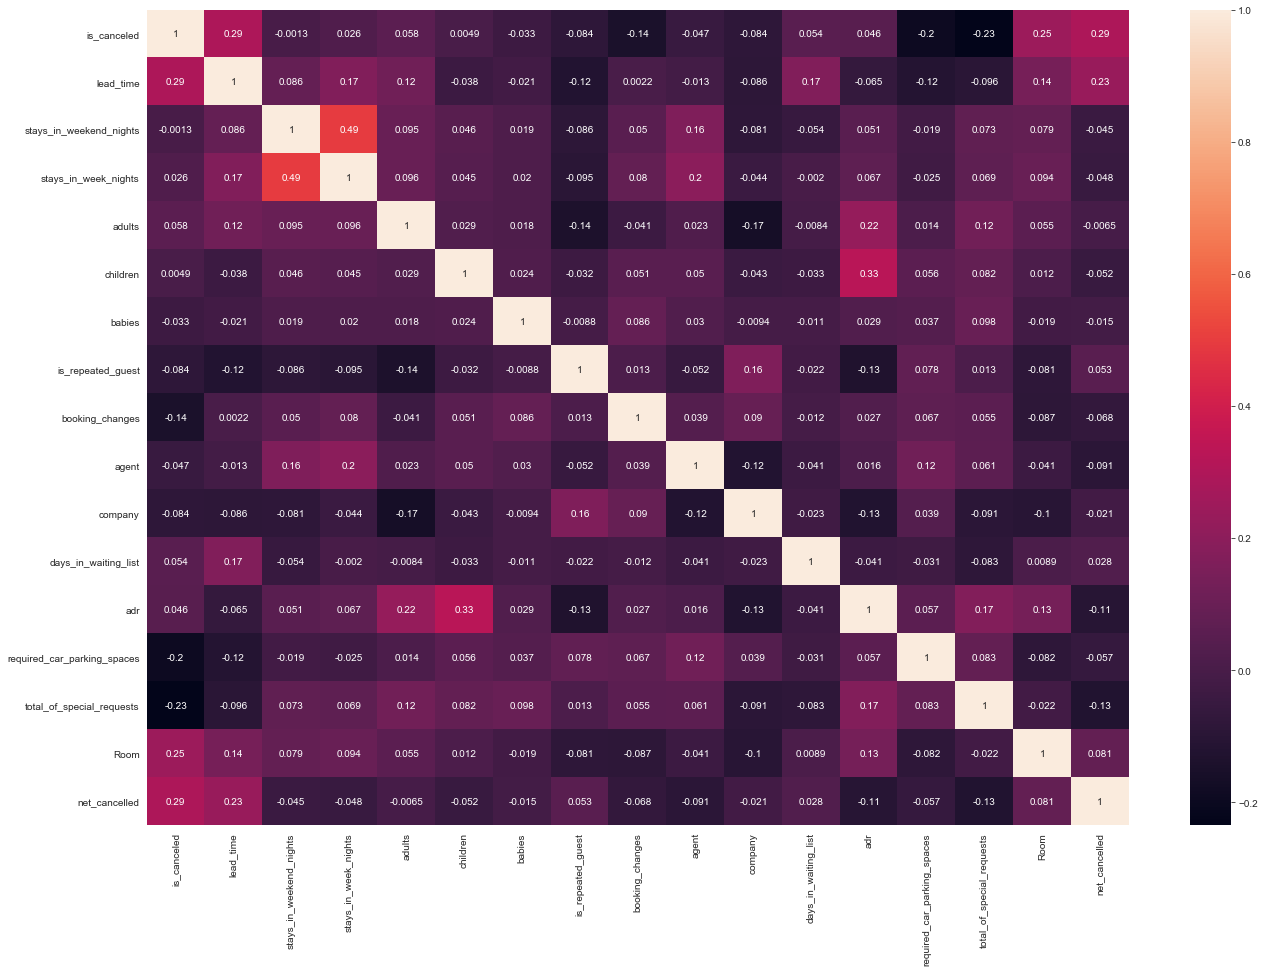

In [21]:
## Heat map
## Interesująca korelacja nowych zmiennych Room i net_cancelled
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);